# Class-Based Biological Similarities for NP Parent Compounds and Predictions


In [1]:
%reload_ext autoreload
%autoreload 2
def warn(*args, **kwargs):
    pass  # to silence scikit-learn warnings

import warnings
warnings.filterwarnings('ignore')
warnings.warn = warn

# Stdlib Imports
from pathlib import Path
import sys
import functools

# Global package Imports
import pandas as pd
import numpy as np
from scipy.stats import median_absolute_deviation as mad

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Project-local Imports
PROJECT_DIR = list(Path("..").absolute().parents)[1]
sys.path.append(str(PROJECT_DIR))
import plt_style
import cpa
import utils as u
from utils import lp

In [2]:
def class_sim(df, list1, list2=None):  # lists of Well_Ids
    result = []
    if list2 is None: # comparison within one class
        last_index = len(list1) - 1
    else:
        last_index = len(list1)
    for idx1, w_id1 in enumerate(list1[:last_index]):
        if list2 is None:
            for w_id2 in list1[idx1+1:]:
                if w_id1 == w_id2: continue
                result.append(cpa.well_id_similarity(df, w_id1, w_id2))
        else:
            for w_id2 in list2:
                if w_id1 == w_id2: continue
                result.append(cpa.well_id_similarity(df, w_id1, w_id2))
    return result

In [3]:
input_dir = "../Input Data"
!ls "$input_dir"

bio_class_comp_well_ids.tsv
cell_painting_data_np_and_predictions.tsv
cell_painting_data.tsv
chembl_26_natprot_ids_only.tsv
chembl_np_std_np_scout_values_only.tsv
drugbank_sample_100.tsv
drugbank_std_np_scout_values_only.tsv
drugbank_std_subset_np_scout_values_only.tsv
enamine_subset_std_ids.tsv
internal_cpds_mc.tsv
internal_cpds_old_cpd_class.tsv
internal_cpds_std_np_scout.tsv
internal_cpds_std_np_scout_values_only.tsv
internal_cpds_std.tsv
internal_cpds.tsv
README.md


## Load Cell Painting Data

In [4]:
df_org = u.read_tsv(f"{input_dir}/cell_painting_data_np_and_predictions.tsv")
lp(df_org, "CP data")

Shape CP data                                     :        149 /  594  


## Calculate Biological Class Similarities 

In [5]:
groups = {
    "NPs": (  # Fragment-sized NPs
        ("GF", ["GF-I-1", "GF-I-2", "GF-THPI", ], ),
        ("QD", ["QD-C-R", "QD-C-S", "QD-I", ], ),
        ("QN", ["QN-C-R", "QN-C-S", "QN-I", ], ),
    ),
    "C-I_1": (  # Pred_C-I_Ind
        ("C-I", ["QN-I", "QD-I", "SM-I-closed", "SM-I-opened", "GF-I-1", "GF-I-2", "GF-THPI", ], ),
    ),
    "C-I_2": (  # Pred_C-I_Chrom
        ("C-I", ["QN-C-S", "QN-C-R", "QD-C-S", "QD-C-R", "SM-C-S", "SM-C-R", ], ),
    ),
    "SM-P": (
        ("SM-P", ["SM-C-S", "SM-C-R", "SM-I-closed", "SM-I-opened", ], ),
    ),        
}

NPs :
  - comparing GF (4)
      with GF-I-1 (21) ...
      with GF-I-2 (11) ...
      with GF-THPI (8) ...
  - comparing QD (4)
      with QD-C-R (10) ...
      with QD-C-S (11) ...
      with QD-I (10) ...
  - comparing QN (3)
      with QN-C-R (15) ...
      with QN-C-S (6) ...
      with QN-I (6) ...
Size: 2 / 5.5


[Text(0.5, 0, 'NPs')]

[Text(0, 0.5, 'GF-I-1'),
 Text(0, 1.5, 'GF-I-2'),
 Text(0, 2.5, 'GF-THPI'),
 Text(0, 3.5, 'QD-C-R'),
 Text(0, 4.5, 'QD-C-S'),
 Text(0, 5.5, 'QD-I'),
 Text(0, 6.5, 'QN-C-R'),
 Text(0, 7.5, 'QN-C-S'),
 Text(0, 8.5, 'QN-I')]

Text(0.5, 1.0, 'Inter-Class Biol. Sim. [%]')

C-I_1 :
  - comparing C-I (8)
      with QN-I (6) ...
      with QD-I (10) ...
      with SM-I-closed (7) ...
      with SM-I-opened (7) ...
      with GF-I-1 (21) ...
      with GF-I-2 (11) ...
      with GF-THPI (8) ...
Size: 2 / 4.5


[Text(0.5, 0, 'C-I_1')]

[Text(0, 0.5, 'GF-I-1'),
 Text(0, 1.5, 'GF-I-2'),
 Text(0, 2.5, 'GF-THPI'),
 Text(0, 3.5, 'QD-I'),
 Text(0, 4.5, 'QN-I'),
 Text(0, 5.5, 'SM-I-closed'),
 Text(0, 6.5, 'SM-I-opened')]

Text(0.5, 1.0, 'Inter-Class Biol. Sim. [%]')

C-I_2 :
  - comparing C-I (8)
      with QN-C-S (6) ...
      with QN-C-R (15) ...
      with QD-C-S (11) ...
      with QD-C-R (10) ...
      with SM-C-S (5) ...
      with SM-C-R (8) ...
Size: 2 / 4.0


[Text(0.5, 0, 'C-I_2')]

[Text(0, 0.5, 'QD-C-R'),
 Text(0, 1.5, 'QD-C-S'),
 Text(0, 2.5, 'QN-C-R'),
 Text(0, 3.5, 'QN-C-S'),
 Text(0, 4.5, 'SM-C-R'),
 Text(0, 5.5, 'SM-C-S')]

Text(0.5, 1.0, 'Inter-Class Biol. Sim. [%]')

SM-P :
  - comparing SM-P (5)
      with SM-C-S (5) ...
      with SM-C-R (8) ...
      with SM-I-closed (7) ...
      with SM-I-opened (7) ...
Size: 2 / 3


[Text(0.5, 0, 'SM-P')]

[Text(0, 0.5, 'SM-C-R'),
 Text(0, 1.5, 'SM-C-S'),
 Text(0, 2.5, 'SM-I-closed'),
 Text(0, 3.5, 'SM-I-opened')]

Text(0.5, 1.0, 'Inter-Class Biol. Sim. [%]')

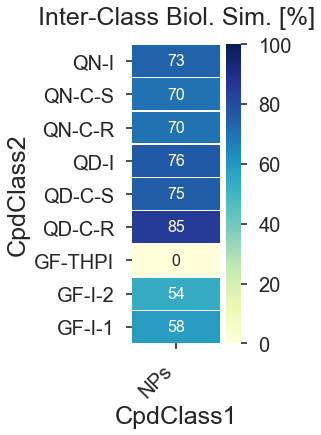

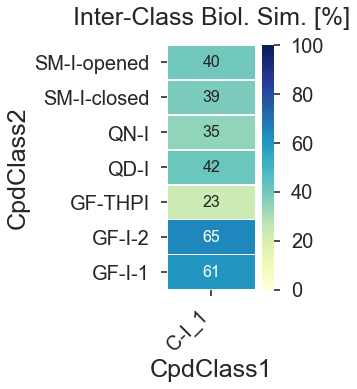

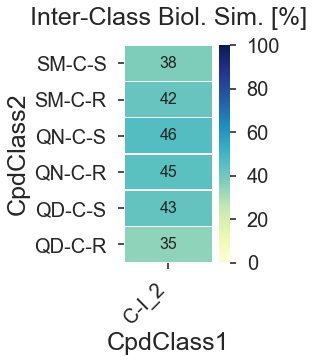

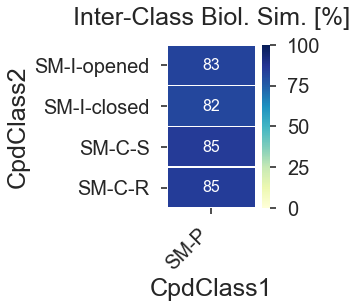

In [6]:
for group in groups:
    print(group, ":")
    df_tmp = df_org.copy()
    series_cpd_class1 = []
    series_cpd_class2 = []
    series_sim = []
    
    for class_pairs in groups[group]:
        cpd_class1 = class_pairs[0]
        cpd_classes2 = class_pairs[1]
        list1 = list(df_tmp[df_tmp["CpdClass"] == cpd_class1]["Well_Id"].values)
        print(f"  - comparing {cpd_class1} ({len(list1)})")
        for cpd_class2 in cpd_classes2:
            list2 = list(df_tmp[df_tmp["CpdClass"] == cpd_class2]["Well_Id"].values)
            print(f"      with {cpd_class2} ({len(list2)}) ...")
            sims = class_sim(df_tmp, list1, list2)
            series_cpd_class1.extend([group] * len(sims))
            series_cpd_class2.extend([cpd_class2] * len(sims))
            series_sim.extend(sims)

    df_sim_inter = pd.DataFrame({"CpdClass1": series_cpd_class1, "CpdClass2": series_cpd_class2, "BioSim": series_sim})
    df_sim_inter.to_csv(f"results/biosim_inter_{group}.tsv", sep="\t", index=False)
    
    df_sim_inter_grp = df_sim_inter.groupby(by=["CpdClass1", "CpdClass2"]).agg([np.median, mad]).reset_index()
    df_sim_inter_grp.columns = df_sim_inter_grp.columns.map('_'.join)
    df_sim_inter_grp = df_sim_inter_grp.rename(columns={"CpdClass1_": "CpdClass1", "CpdClass2_": "CpdClass2"})
    df_sim_inter_grp.to_csv(f"results/biosim_inter_grp_{group}.tsv", sep="\t", index=False)

    tmp = df_sim_inter_grp.copy()
    tmp["BioSim_median"] = tmp["BioSim_median"] * 100
    tmp = tmp.pivot("CpdClass2", "CpdClass1", "BioSim_median")
    x_size = 2
    y_size = max(3, 1.0 + 0.5 * len(set(series_cpd_class2)))
    print(f"Size: {x_size} / {y_size}")
    fs = (x_size, y_size)
    # plt.rcParams['axes.titlesize'] = 25
    f, ax = plt.subplots(figsize=fs)
    hm = sns.heatmap(tmp, annot=True, fmt=".0f", linewidths=.5, annot_kws={"size": 16}, cmap="YlGnBu", vmin=0.0, vmax=100.0, ax=ax)
    hm.invert_yaxis()
    hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
    hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
    hm.set_title("Inter-Class Biol. Sim. [%]", pad=20)
    fig = hm.get_figure()
    fig.savefig(f"plots/bio_sim_inter_{group}.png", bbox_inches='tight');